# Exploratory Data Analysis (EDA)
## General Structure
Dataset includes **3** columns and **500** rows.
There are **1** different data types as follows: *object*.

Let's review the dataset description:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>unique</th>
      <th>top</th>
      <th>freq</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Article_ID</th>
      <td>500</td>
      <td>500</td>
      <td>TRAIN_1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>Article_content</th>
      <td>500</td>
      <td>499</td>
      <td>Starting in the late 1950s, in computer facilities at mIT, Stanford, and other research universities people began to encounter persons who had both unusual programming skill and an obsession with the inner workings of the machine. While ordinary users viewed the computer sim-ply as a tool for solving particular problems, this peculiar breed of programmers reveled in extending the capabilities of the system and creating tools such as program editors that would make it easier to create even more powerful programs. The movement from mainframes that could run only one program at a time to machines that could simulta-neously serve many users created a kind of environmental niche in which these self-described hackers could flourish. Indeed, while administrators sometimes complained that hackers took up too much of the available computer time, they often depended on them to fix the bugs that infested the first versions of time-sharing operating systems. Hack-ers also tended to work in the wee hours of the night while normal users slept.</td>
      <td>2</td>
    </tr>
    <tr>
      <th>Article_type</th>
      <td>500</td>
      <td>2</td>
      <td>Human-written</td>
      <td>386</td>
    </tr>
  </tbody>
</table>

There is **2** unique value in **Article_type** column which is a target column.
let's see frequency of values for the target column of {col}:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
    </tr>
    <tr>
      <th>Article_type</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Human-written</th>
      <td>386</td>
    </tr>
    <tr>
      <th>AI-generated</th>
      <td>114</td>
    </tr>
  </tbody>
</table>

# Input Dataset

In [1]:
# LOAD DATA
import pandas as pd
train_dataset = pd.read_csv("./train_set.csv", encoding="UTF-8", delimiter=",")

## Visualization for data distribution of columns

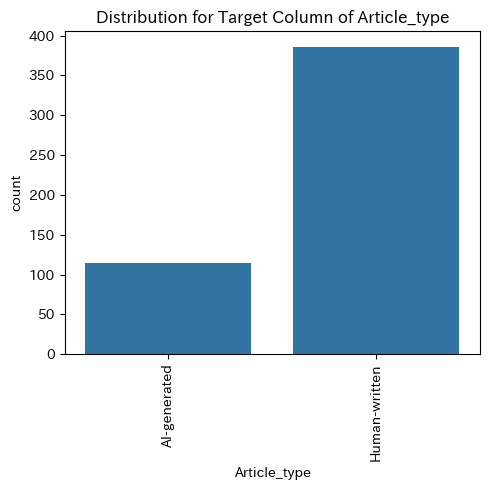

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import numpy as np


fig = plt.figure(figsize=(5,5))
sns.countplot(x = train_dataset["Article_type"].fillna("").astype(str), order=sorted(train_dataset["Article_type"].fillna("").astype(str).unique()))
plt.xticks(rotation=90)
plt.title("Distribution for Target Column of Article_type")
fig.tight_layout()


In [3]:
# TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
def split_dataset(dataset, train_size=0.85, random_state=1024):
    train_dataset, test_dataset = train_test_split(dataset, train_size=train_size, random_state=random_state)
    return train_dataset, test_dataset	
train_dataset, test_dataset = split_dataset(train_dataset)

In [4]:
# DROP IGNORED COLUMNS
ignore_columns = ['Article_ID']
train_dataset = train_dataset.drop(ignore_columns, axis=1, errors="ignore")
test_dataset = test_dataset.drop(ignore_columns, axis=1, errors="ignore")

## Text Processing
The dataset has **1** text value as follows: **Article_content**.
Now, let's covert the text as follows.

- First, convert text to lowercase;

- Second, strip all punctuations;

- Finally, convert all numbers in text to 'num'; therefore, in the next step our model will use a single token instead of valriety of tokens of numbers.

## ML Explainability Tips:

The following codes are generated with a confidence level of **0.8** because of the following reasons apply to **1** column(s) that include ['Article_content'].


1. There is a text value that includes blank space among the columns with a score of **1** which is greater than **0.5**.

In [5]:
# PREPROCESSING-1
# Component: Preprocess:TextPreprocessing
# Efficient Cause: Preprocess:TextPreprocessing is required in this pipeline since the dataset has ['feature:str_text_presence']. The relevant features are: ['Article_content'].
# Purpose: Preprocess and normalize text.
# Form:
#   Input: array of strings
#   Key hyperparameters used: None
# Alternatives: Although  can also be used for this dataset, Preprocess:TextPreprocessing is used because it has more  than .
# Order: Preprocess:TextPreprocessing should be applied  
import re
import string
import nltk
TEXT_COLUMNS = ['Article_content']
def process_text(__dataset):
    for _col in TEXT_COLUMNS:
        process_text = [t.lower() for t in __dataset[_col]]
        # strip all punctuation
        table = str.maketrans('', '', string.punctuation)
        process_text = [t.translate(table) for t in process_text]
        # convert all numbers in text to 'num'
        process_text = [re.sub(r'\d+', 'num', t) for t in process_text]
        __dataset[_col] = process_text
    return __dataset
train_dataset = process_text(train_dataset)
test_dataset = process_text(test_dataset)

### Target Column
We need to predict the target column.
Therefore, we need to detach the target column in prediction.
When the test data has the target column, the detaching is also executed for the test data.Here is the list of *target column*: **Article_type**

In [6]:
# DETACH TARGET
TARGET_COLUMNS = ['Article_type']
feature_train = train_dataset.drop(TARGET_COLUMNS, axis=1)
target_train = train_dataset[TARGET_COLUMNS].copy()
if set(TARGET_COLUMNS).issubset(test_dataset.columns.tolist()):
    feature_test = test_dataset.drop(TARGET_COLUMNS, axis=1)
    target_test = test_dataset[TARGET_COLUMNS].copy()
else:
    feature_test = test_dataset

# Text Vectorizer
In the next step, we will transfer pre-processed text columns to a vector representation. The vector representation allows us to train a model based on numerical representations.
We will use TfidfVectorizer and more detail can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

## ML Explainability Tips:

The following codes are generated with a confidence level of **0.84** because of the following reasons apply to **1** column(s) that include ['Article_content'].


1. There is a text value that includes blank space among the columns with a score of **1** which is greater than **0.5**.

In [7]:
# PREPROCESSING-2
# Component: Preprocess:TfidfVectorizer
# Efficient Cause: Preprocess:TfidfVectorizer is required in this pipeline since the dataset has ['feature:str_text_presence']. The relevant features are: ['Article_content'].
# Purpose: Convert a collection of raw documents to a matrix of TF-IDF features.
# Form:
#   Input: raw_documents
#   Key hyperparameters used: 
#		 "max_features: int, default=None" :: If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. This parameter is ignored if vocabulary is not None.
# Alternatives: Although  can also be used for this dataset, Preprocess:TfidfVectorizer is used because it has more  than .
# Order: Preprocess:TfidfVectorizer should be applied  
from sklearn.feature_extraction.text import TfidfVectorizer
TEXT_COLUMNS = ['Article_content']
temp_train_data = feature_train[TEXT_COLUMNS]
temp_test_data = feature_test[TEXT_COLUMNS]
# Make the entire dataframe sparse to avoid it converting into a dense matrix.
feature_train = feature_train.drop(TEXT_COLUMNS, axis=1).astype(pd.SparseDtype('float64', 0))
feature_test = feature_test.drop(TEXT_COLUMNS, axis=1).astype(pd.SparseDtype('float64', 0))
for _col in TEXT_COLUMNS:
    tfidfvectorizer = TfidfVectorizer(max_features=3000)
    vector_train = tfidfvectorizer.fit_transform(temp_train_data[_col])
    feature_names = ['_'.join([_col, name]) for name in tfidfvectorizer.get_feature_names_out()]
    vector_train = pd.DataFrame.sparse.from_spmatrix(vector_train, columns=feature_names, index=temp_train_data.index)
    feature_train = pd.concat([feature_train, vector_train], axis=1)
    vector_test = tfidfvectorizer.transform(temp_test_data[_col])
    vector_test = pd.DataFrame.sparse.from_spmatrix(vector_test, columns=feature_names, index=temp_test_data.index)
    feature_test = pd.concat([feature_test, vector_test], axis=1)

In [8]:
# BEST PARAMETERS IN THE CANDIDATE SCRIPT
# PLEASE SEE THE CANDIDATE SCRIPTS FOR THE HYPERPARAMTER OPTIMIZATION CODE
best_params = {'n_estimators': 154, 'algorithm': 'SAMME'}

# Train a Model

# Training and Prediction
First, we will train a model based on the pre-processed training dataset.
Second, let's predict test values based on the trained model.

## ML Explainability Tips:

This is a **Classifier** problem and we are selecting **AdaBoostClassifier** with a probability of **0.05**. The following are alternative options.
This model is selected based on the best **ROC_AUC** of **0.914**.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Model</th>
      <th>Probability</th>
      <th>ROC_AUC</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>GaussianNB</td>
      <td>0.28</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>LogisticRegression</td>
      <td>0.1</td>
      <td>0.85</td>
    </tr>
    <tr>
      <th>3</th>
      <td>AdaBoostClassifier</td>
      <td>0.05</td>
      <td>0.914</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ExtraTreesClassifier</td>
      <td>0.05</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DecisionTreeClassifier</td>
      <td>0.05</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>6</th>
      <td>GradientBoostingClassifier</td>
      <td>0.05</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>7</th>
      <td>LGBMClassifier</td>
      <td>0.05</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>8</th>
      <td>CatBoostClassifier</td>
      <td>0.05</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>9</th>
      <td>RandomForestClassifier</td>
      <td>0.04</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>10</th>
      <td>XGBClassifier</td>
      <td>0.04</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>11</th>
      <td>LinearSVC</td>
      <td>0.04</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>12</th>
      <td>MultinomialNB</td>
      <td>0.03</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>13</th>
      <td>BernoulliNB</td>
      <td>0.03</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>14</th>
      <td>MLPClassifier</td>
      <td>0.03</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>15</th>
      <td>SVC</td>
      <td>0.03</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>16</th>
      <td>SGDClassifier</td>
      <td>0.03</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th>17</th>
      <td>WideLearnerClient</td>
      <td>0.0</td>
      <td>N/A</td>
    </tr>
  </tbody>
</table>

In [9]:
# MODEL
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
random_state_model = 42
model = AdaBoostClassifier(random_state=random_state_model, **best_params)
model.fit(feature_train, target_train.values.ravel())
y_pred = model.predict(feature_test)
y_prob = model.predict_proba(feature_test)
# POST PROCESSING
if np.shape(y_prob)[1] == 2:
    y_prob = y_prob[:, 1]

In [10]:
#EVALUATION
if set(TARGET_COLUMNS).issubset(test_dataset.columns.tolist()):
    from sklearn.metrics import roc_auc_score
    __roc_auc = roc_auc_score(target_test, y_prob)
    print('RESULT: ROC AUC:', str(__roc_auc))

RESULT: ROC AUC: 0.8766666666666666


## Confusion Matrix
confusion_matrix shows how many predictions are correct and incorrect per class.

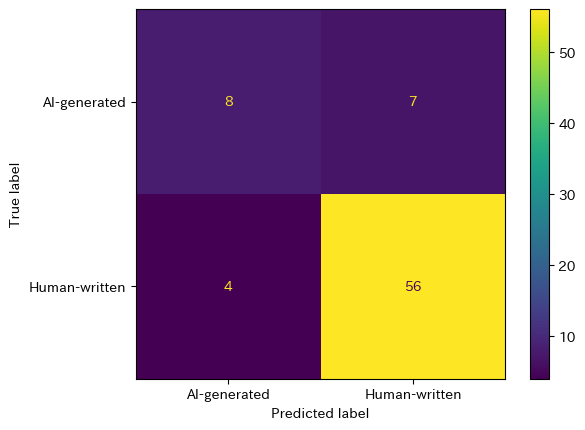

In [11]:
# Confusion Matrix
if set(TARGET_COLUMNS).issubset(test_dataset.columns.tolist()):
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_predictions(target_test, y_pred)

## Prediction File
Our prediction results will be output to "prediction_result.csv".

In [12]:
# OUTPUT PREDICTION
prediction = pd.DataFrame(y_pred, columns=TARGET_COLUMNS, index=feature_test.index)
prediction.to_csv("./prediction_result.csv")

In [13]:
# Models are restricted because of execution time.
models_for_shap = ['XGBClassifier', 'XGBRegressor', 'LGBMClassifier', 'LGBMRegressor', 'GradientBoostingClassifier', 'GradientBoostingRegressor']
if model.__class__.__name__ in models_for_shap:
    import shap
    feature_shap = feature_train.sample(1000) if feature_train.shape[0] > 1000 else feature_train
    explainer = shap.Explainer(model)
    shap_values = explainer(feature_shap)
    # summarize the effects of all the features
    shap.plots.beeswarm(shap_values)
    #bar plots
    shap.plots.bar(shap_values)